In [1]:
# Import dependencies
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Read data
red_zone_qb_proximity = pd.read_csv('https://storage.googleapis.com/big-data-bowl/redZoneQBProximity.csv')

week1 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week1.csv')

In [4]:
player_teams = week1[['nflId', 'team']].groupby(['nflId', 'team']).first().reset_index()

In [5]:
red_zone_qb_proximity_team = red_zone_qb_proximity.merge(
    player_teams,
    left_on=['nflId2'],
    right_on=['nflId']
)
red_zone_qb_proximity_team

,gameId,playId,frameId,nflId_x,officialPosition,nflId2,officialPosition2,matchupOpposing,distance,angle,nflId_y,team
0,2021090900,410,1,25511.0,QB,35481.0,TE,0,6.035006,139.367813,35481.0,TB
1,2021090900,410,2,25511.0,QB,35481.0,TE,0,5.992704,139.398705,35481.0,TB
2,2021090900,410,3,25511.0,QB,35481.0,TE,0,6.013319,139.316028,35481.0,TB
3,2021090900,410,4,25511.0,QB,35481.0,TE,0,6.012271,139.181638,35481.0,TB
4,2021090900,410,5,25511.0,QB,35481.0,TE,0,6.010275,138.912721,35481.0,TB
...,...,...,...,...,...,...,...,...,...,...,...,...
798227,2021103109,2288,26,39987.0,QB,44870.0,C,0,4.013839,250.346176,44870.0,SEA
798228,2021103109,2288,27,39987.0,QB,44870.0,C,0,4.004060,249.075498,44870.0,SEA
798229,2021103109,2288,28,39987.0,QB,44870.0,C,0,3.994621,247.479434,44870.0,SEA
798230,2021103109,2288,29,39987.0,QB,44870.0,C,0,3.986640,245.234897,44870.0,SEA


In [6]:
max_pressure = red_zone_qb_proximity_team[red_zone_qb_proximity_team['matchupOpposing'] == 1][['playId', 'distance', 'team']].groupby('playId').min().reset_index()

In [13]:
def generate_plot(team):
    fig, ax1 = plt.subplots()
    max_pressure[max_pressure['team'] == team]['distance'].plot.density(figsize=(10,4),
                              xlim=(5,0))
    ax2 = ax1.twinx()
    ax2.hist(max_pressure[max_pressure['team'] == team]['distance'], alpha=0.1, bins=18)
    plt.xlabel('Distance from QB')
    plt.ylabel('Frequency')
    plt.title(f'Max Pressure by Play - {team}')

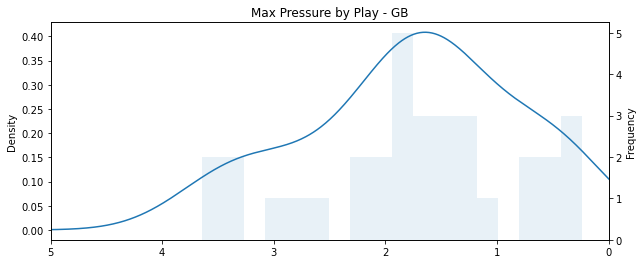

In [14]:
generate_plot('GB')

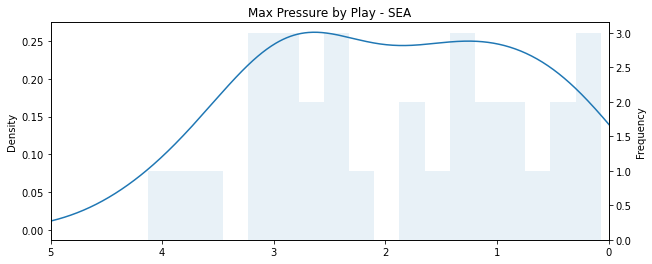

In [15]:
generate_plot('SEA')